In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]



/tmp/ipykernel_3184305/1060970613.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


~~~
[INFO] Input: MPOLICY ondemand^M
[INFO] Input: MQUERY query5^M
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00^M
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000^M
[INFO] Input: NITERS 0^M
[INFO] Input: FLINK_RATE 2000_300000 4000_300000 6000_300000 8000_300000^M
[INFO] Input: FLINK_RATE_TYPE static^M
[INFO] Input: BUFF -1^M
[INFO] Input: NCORES 16^M
[INFO] Input: IPWINDOW 10.10.1.3^M
[INFO] Input: MCFG 1;4;16 1;8;16 1;12;16 1;16;16^M
[INFO] Input: WINDOW_LENGTH 60^M
[INFO] Input: FLINK_CHECKPOINTING_ENABLED true^M
[INFO] Input: FLINK_CHECKPOINTING_INTERVAL 5000 10000 15000^M
[INFO] Input: FLINK_CHECKPOINTING_MODE exactly_once atleast_once^M
[INFO] Input: FLINK_ROCKSDB_STATE_BACKEND_ENABLED true
~~~

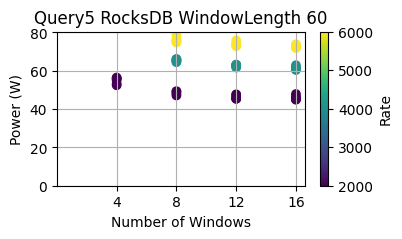

In [2]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['rate'], cmap='viridis')
plt.colorbar(label='Rate')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 60')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


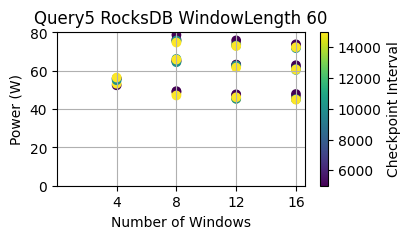

In [3]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['CheckpointInterval'], cmap='viridis')
plt.colorbar(label='Checkpoint Interval')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 60')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


In [ ]:
d3 = d2[d2['CheckpointMode'] == 'exactly_once']
plt.figure(figsize=(4,2))
plt.scatter(d3['nwindows'], d3['pkg_watts_avg'], c=d3['rate'], cmap='viridis')
plt.colorbar(label='')
plt.xticks(d3.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20, CheckpointMode exactly_once')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
